In [1]:
import matplotlib.pyplot as plt
import pyaerocom as pya

import glob
from iris import load_cube

#plt.close("all")
#print("uses last changes ")
model_data_orig = pya.io.ReadGridded('ECMWF_CAMS_REAN').read_var('od550aer')
#data = data.filter_region(region_id  = 'SEAhtap')
#data.quickplot_map()
#plt.show()

Deactivating file search by vertical code for ECMWF_CAMS_REAN, since filenames do not include information about vertical code (probably AeroCom 2 convention)
ECMWF_CAMS_REAN.daily.od550aer.2019.nc


In [2]:
def load_region_mask_iris(region_id='PANhtap'):
    """    
    Returns
    ---------
    mask : xarray.DataArray containing the masks. 
    
    TODO : Update this one to send in a list and return the sum of the list. 
    
    pya.const.OUTPUTDIR
    """
    #path = const.OUTPUTDIR
    #path  = '/home/hannas/MyPyaerocom/htap_masks/'  # TODO : this should be MyPyaerocom ..... get from config
    #path = "/home/hannas/Desktop/htap/"
    
    path = "/home/hannas/Desktop/pyaerocom-suppl/htap_masks/"
    fil =  glob.glob(path + region_id + '*0.1*.nc')[0]
    masks = load_cube(fil)
    return masks

In [3]:
import numpy.ma as ma

In [4]:
region_id = 'SEAhtap'

mask_iris = load_region_mask_iris(region_id='PANhtap')

# Reads mask to griddedata 
mask_cube  = pya.GriddedData(mask_iris)

M_regr = mask_cube.regrid(model_data_orig.cube)

mask_iris = load_region_mask_iris(region_id = region_id)

npm = M_regr.cube.data.data

# Apply threshold on coast        
thresh_coast=0.5

thresh_mask = npm > thresh_coast
npm[thresh_mask] = 0
npm[~thresh_mask] = 1

try:
    cube_data = model_data.cube.data
    #example = ma.array([1, 2, 3], mask = [0, 1, 0])
    if isinstance(cube_data, ma.core.MaskedArray):
        # UPDATE MASK WITH REGIONAL MASK.
        model_data.cube.data.mask = npm

except MemoryError:
    raise NotImplementedError(" Comming soon... ")

NameError: name 'model_data' is not defined

In [ ]:
model_data.quickplot_map()

In [ ]:
model_data_orig.quickplot_map()

In [5]:
pya.browse_database('*MODIS6*aqua*')


Pyaerocom ReadGridded
---------------------
Data ID: MODIS6.1aqua
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.1aqua/renamed
Available experiments: ['MODIS6.1aqua']
Available years: [2005, 2006, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]
Available frequencies ['daily']
Available variables: ['od550aer']

Pyaerocom ReadGridded
---------------------
Data ID: MODIS6.aqua
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/SATELLITE-DATA/MODIS6.aqua/renamed
Available experiments: ['MODIS6.aqua']
Available years: [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014]
Available frequencies ['daily']
Available variables: ['od550aer']


['WORLD', 'wMOUNTAINS']


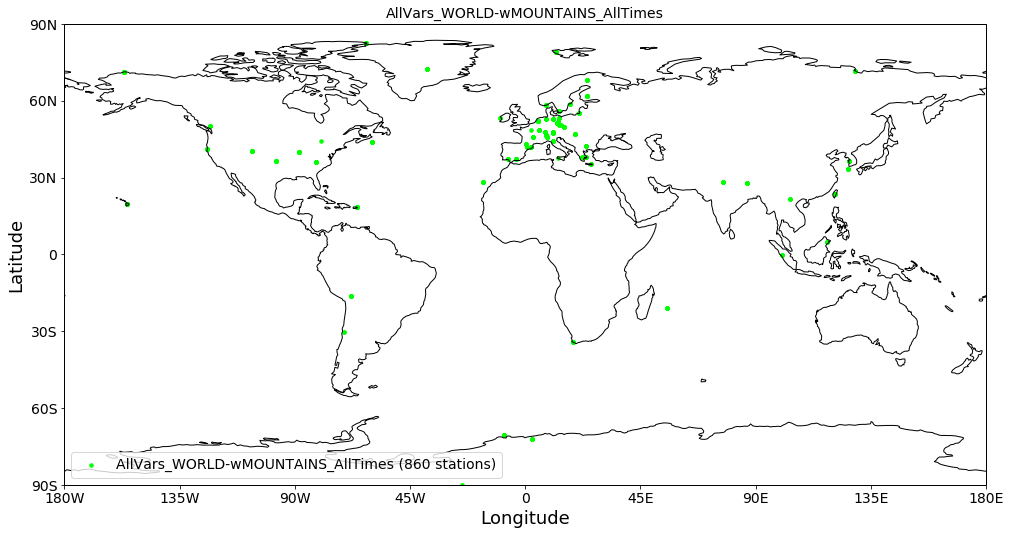

In [6]:
ungridded_data =  pya.io.ReadUngridded().read('EBASMC', 'absc550aer')

#coloc = oya

ungridded_data.plot_station_coordinates(marker = 'o', markersize=12, color='lime')

In [7]:
## get help from jonas on this



In [8]:
ungridded_data

UngriddedData <networks: ['EBASMC']; vars: ['absc550aer']; instruments: ['GMD_CLAP-3W_BEO', 'Magee_AE31_CHC_ambient', 'MAAP_5012_CHACALTAYA_BOLIVIA', 'Radiance-Research_PSAP-1W_EGB_pm10', 'Radiance-Research_PSAP-1W_WHI_pm10', 'Radiance-Research_PSAP-1W_WSA_pm10', 'Radiance-Research_PSAP-3W_WSA_pm10', 'Radiance-Research_PSAP-3W_ALT', 'Radiance-Research_PSAP-1W_ALT', 'Radiance-Research_PSAP-1W_ALT_pm10', 'Radiance-Research_PSAP-3W_ALT_pm10', 'Magee_AE31_ALT', 'GMD_CLAP-3W_ALT_pm10', 'Magee_AE31_JFJ', 'Carusso_MAAP_42545-15_No011', 'Carusso_MAAP_42545_15_No011', 'Magee_AE337_JFJ', 'Magee_AE33_JFJ', 'Magee_AE31_TLL_dry', 'Magee_AE31', 'Magee_AE31_KOS_dry', 'MAAP_CHMI_Usti', 'MAAP-5012_Waldhof_pm10', 'MAAP-5012_DE0003R_aerosol', 'MAAP-5012_DE08_1', 'MAAP-5012_SSL', 'MAAP-5012_NGL', 'MAAP_5012_PM10', 'TE_MAAP', 'TE_MAAP_dry', 'MAAP-5012_DE08', 'MAAP-5012_Melpitz', 'MAAP-5012_ZUGSPITZE', 'MAAP-5012_DE08_pm10', 'MAAP-5012_Boesel', 'MAAP_NM', 'MAAP_NMY', 'MAAP_LfULG_Annaberg-Buchholz', 'MAAP-50

# Filter using the filter clas

In [9]:
from pyaerocom.filter import Filter

In [10]:
f = Filter('EURhtap')

['EURhtap', 'noMOUNTAINS']


In [11]:
f

Filter([('_name', 'EURHTAP-noMOUNTAINS'),
        ('_region',
         Region EURHTAP Region([('_name', 'EURHTAP'), ('lon_range', [-132.95, -55.55]), ('lat_range', [27.75, 66.45]), ('lon_range_plot', [-132.95, -55.55]), ('lat_range_plot', [27.75, 66.45]), ('lon_ticks', None), ('lat_ticks', None)])),
        ('lon_range', [-132.95, -55.55]),
        ('lat_range', [27.75, 66.45]),
        ('alt_range', [-1000000.0, 1000.0]),
        ('mask', None)])

In [12]:
ungridded_da = f.apply(ungridded_data)

Tries new region EURHTAP-noMOUNTAINS
Searching for mask EUR
<xarray.Dataset>
Dimensions:  (lat: 1800, long: 3600)
Coordinates:
  * lat      (lat) float64 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * long     (long) float64 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
Data variables:
    EURhtap  (lat, long) float64 ...
Attributes:
    Conventions:               CF-1.0
    Source_Software:           ESRI ArcGIS
    history:                   Wed Oct  5 09:52:20 2016: ncap2 -o EURhtap.0.1...
    nco_openmp_thread_number:  1
<xarray.DataArray 'EURhtap' (lat: 1800, long: 3600)>
[6480000 values with dtype=float64]
Coordinates:
  * lat      (lat) float64 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * long     (long) float64 -180.0 -179.9 -179.8 -179.7 ... 179.7 179.8 179.9
Attributes:
    esri_pe_string:  GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1...
    long_name:       source_code
    units:           Degree
passes loop


['WORLD', 'wMOUNTAINS']


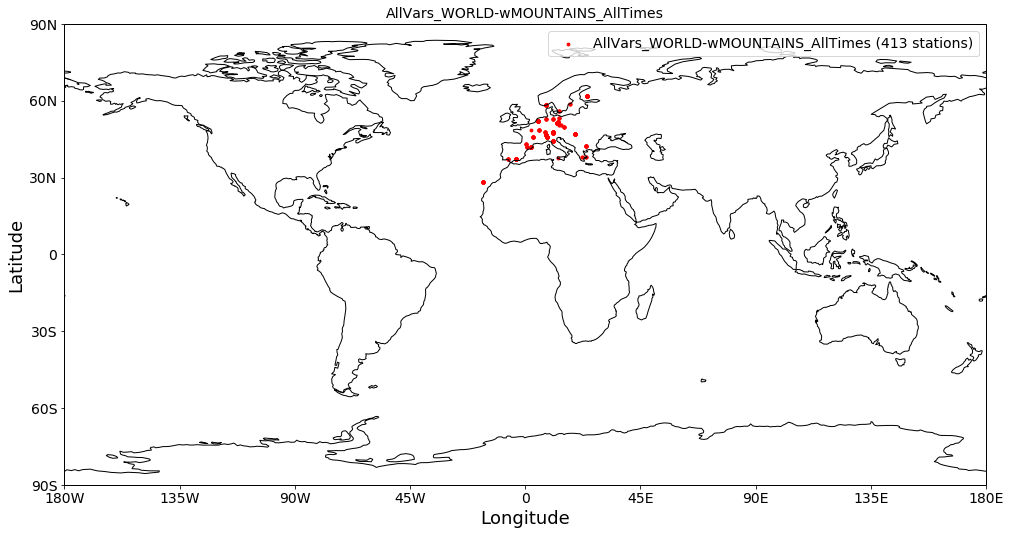

In [13]:
ungridded_da.plot_station_coordinates()

['WORLD', 'wMOUNTAINS']


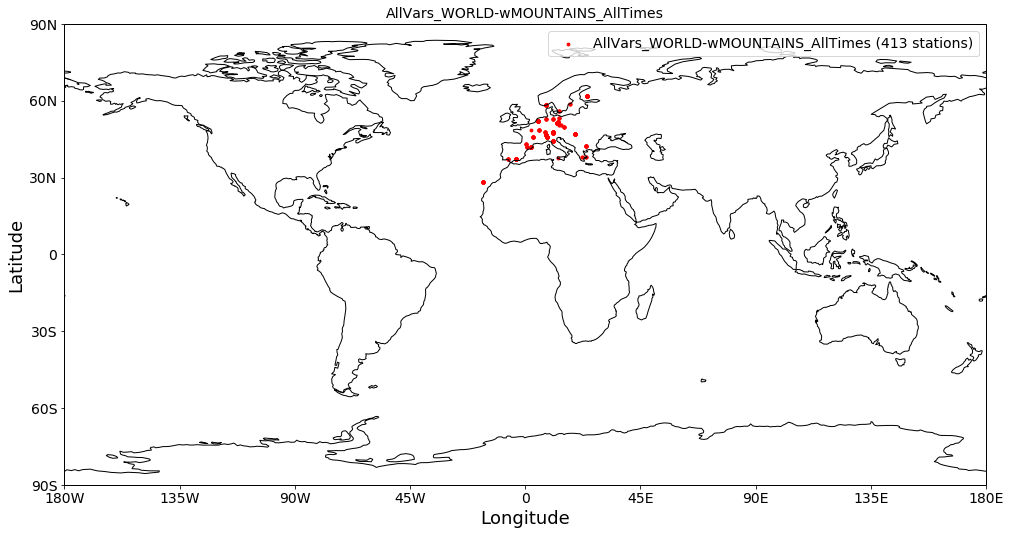

In [14]:
ungridded_data.plot_station_coordinates()

In [15]:
subset = f.apply(model_data_orig)

Tries new region EURHTAP-noMOUNTAINS


KeyboardInterrupt: 

In [ ]:
subset.quickplot_map()

# TODO  check that it works for colocated data

In [16]:
import pyaerocom as pya
pya.change_verbosity('critical')

YEAR = 2010
VAR = "od550aer"
TS_TYPE = "daily"
MODEL_ID = "ECMWF_CAMS_REAN"
OBS_ID = 'AeronetSunV3Lev2.daily'

model_reader = pya.io.ReadGridded(MODEL_ID)
model_data = model_reader.read_var(VAR, start=YEAR)

obs_reader = pya.io.ReadUngridded(OBS_ID, [VAR, 'ang4487aer'])
obs_data = obs_reader.read().filter_by_meta(altitude=[0, 1000])

data_coloc = pya.colocation.colocate_gridded_ungridded(model_data, obs_data, ts_type='monthly', filter_region = "EURhtap")
data_coloc

['WORLD', 'noMOUNTAINS']
Tries new region WORLD-noMOUNTAINS
Searching for mask WORLD-noMOUNTAINS


IndexError: list index out of range